# Experimental Playground for DEF-ERA5

...

# Script Testing

...

In [1]:
from hydra import initialize, compose
from diffusion_eval import main 
import torch
import matplotlib.pyplot as plt

2025-02-11 16:47:19.453836: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 16:47:19.469587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 16:47:19.488482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 16:47:19.494346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 16:47:19.508617: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
def run_evaluation():
    with initialize(version_base=None, config_path="./config"):
        cfg = compose(config_name="diffusion")
        results = main(cfg)  
        return results

results = run_evaluation()

Deterministic model loaded!
Diffusion model loaded!
Now using GPU.


/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/diffusers/schedulers/scheduling_dpmsolver_multistep.py:239: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.betas = torch.tensor(trained_betas, dtype=torch.float32)


Deterministic predictions & ground truth generated!


DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

DPM++:   0%|          | 0/25 [00:00<?, ?it/s]

In [4]:
ground, predictions, diff_predictions = results

In [5]:
ground.shape, predictions.shape, diff_predictions.shape

((30, 85, 32, 64), (30, 85, 32, 64), (30, 32, 85, 32, 64))

In [43]:
rmse = lambda x, y: np.sqrt(np.mean((x - y)**2, axis=(-2, -1))) 

In [44]:
import math
import numpy as np

In [45]:
mean_out = rmse(ground, diff_predictions.mean(axis=1))

In [46]:
det_out = rmse(ground, predictions)

In [78]:
ind = 30
timestep = -1

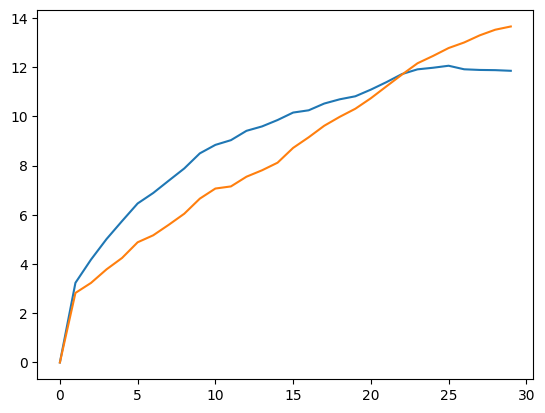

In [79]:
plt.plot(mean_out[:, ind]);
plt.plot(det_out[:, ind]);

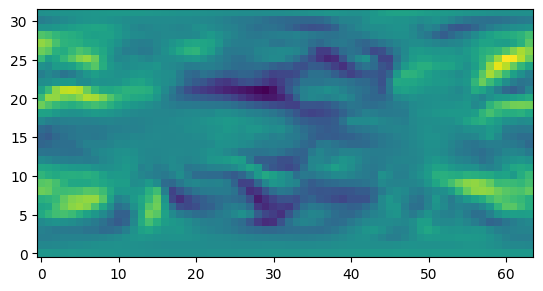

In [80]:
plt.imshow(torch.from_numpy(ground[timestep, ind]), origin='lower');

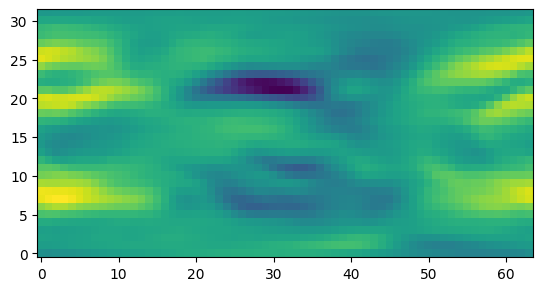

In [81]:
plt.imshow(torch.from_numpy(diff_predictions).mean(dim=1)[timestep, ind], origin='lower');

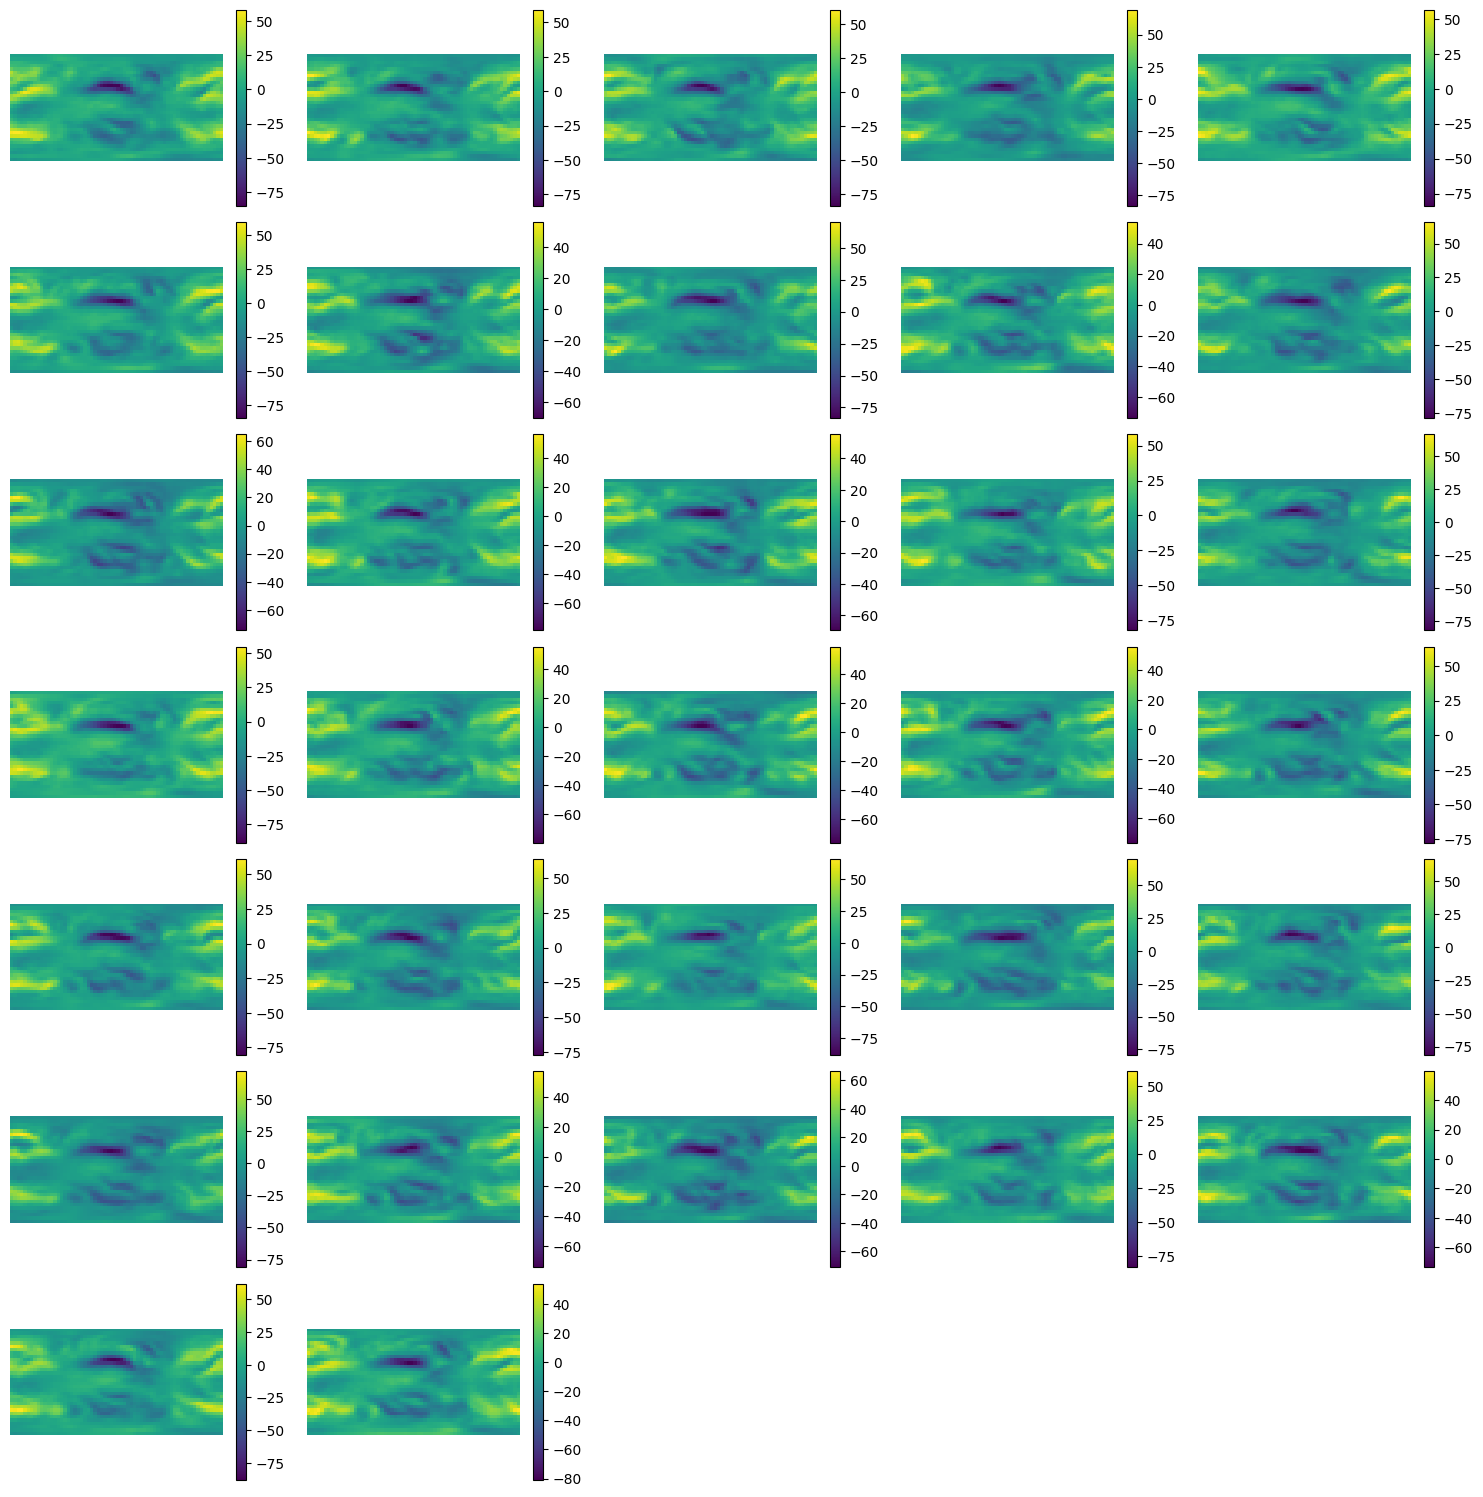

In [82]:
plot_all_channels(torch.from_numpy(diff_predictions[timestep, :, ind]).unsqueeze(0))

In [1]:
from model.objectives.meanrmse import EnsembleMeanRMSE
import torch

## Import/Setup

In [3]:
import sys
from hydra import initialize, compose
import matplotlib.pyplot as plt
import evaluation.utility as eval_utility
import torch
import numpy as np
from tqdm.notebook import tqdm
import math
from data.era5_diffusion_dataset import ERA5DiffusionDataset
from diffusers import DPMSolverMultistepScheduler

import model.deterministic.model as model_det
import model.diffusion.model as model
import model.schedulers as schedulers
import model.optimizers as optimizers
import model.utility as model_utility
import model.objectives.diffusion_loss as loss
#import model.diffusion.train as training

In [4]:
with initialize(version_base=None, config_path="./config"):
    # Compose the configuration (load the config file)
    cfg = compose(config_name="config")

In [5]:
train = ERA5DiffusionDataset(
    root_dir=cfg['dataset']['root_dir'],
    start_date=cfg['training']['validation_dataset']['start_date'],
    end_date=cfg['training']['validation_dataset']['end_date'],
    timesteps=1000,
    cfg=cfg,
)

In [30]:
import torch
import matplotlib.pyplot as plt
import math

def plot_all_channels(tensor, channel_names=None):
    # Ensure the tensor has the correct shape
    if tensor.dim() != 4 or tensor.shape[0] != 1:
        raise ValueError("Input tensor must have shape [1, channels, height, width].")

    # Get the number of channels
    num_channels = tensor.shape[1]
    
    # Number of channels per figure
    channels_per_figure = 9  # 3x3 grid
    
    # Number of figures needed
    num_figures = math.ceil(num_channels / channels_per_figure)
    
    for fig_idx in range(num_figures):
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
        axes = axes.flatten()
        
        start_idx = fig_idx * channels_per_figure
        end_idx = min(start_idx + channels_per_figure, num_channels)
        
        for i, channel_idx in enumerate(range(start_idx, end_idx)):
            ax = axes[i]
            channel_data = tensor[0, channel_idx].cpu().numpy()  # Move to CPU and convert to numpy
            im = ax.imshow(channel_data, cmap="viridis", origin="lower")
            fig.colorbar(im, ax=ax)
            ax.axis("off")
            if channel_names:
                ax.set_title(channel_names[channel_idx])

        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        plt.savefig(f'all_var_part_{fig_idx + 1}.png')
        plt.close(fig)  # Close the figure to free memory


In [31]:
plot_all_channels(train[0][0].unsqueeze(0))

In [6]:
x_grid, force_constants, noisy_states, rand_timesteps  = train[0]

In [7]:
diffusion_model = model.get_unet_based_model(
    x = 32, y = 64,
    channels = 85, cfg = cfg
).to('cuda')

In [8]:
beta = torch.linspace(1e-4, 0.02, 1000).to('cuda')
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0).to('cuda')

In [9]:
model_utility.load_model_weights(diffusion_model, '/data/users/jupyter-dam724/def-era/checkpoint/diffusion/diffusion-larger/states/checkpoint_epoch_299.pt')

In [10]:
def plot_state_with_uncertainty(state, uncertainty, t1, t2, cmap='gray', uncertainty_alpha=0.5):    
    # Create a figure with a specific size
    plt.figure(figsize=(12, 6))
    
    # Create two subplots side by side
    plt.subplot(121)
    
    # Plot the state
    im1 = plt.imshow(state, cmap=cmap, origin='lower')
    plt.colorbar(im1, label='State Value')
    plt.title(t1)
    
    # Plot the uncertainty
    plt.subplot(122)
    im2 = plt.imshow(state, cmap=cmap, origin='lower')
    
    # Overlay uncertainty with a different colormap and transparency
    uncertainty_normalized = (uncertainty - uncertainty.min()) / (uncertainty.max() - uncertainty.min())
    im3 = plt.imshow(uncertainty_normalized, cmap='Reds', alpha=uncertainty_alpha, origin='lower')
    
    plt.colorbar(im3, label='Uncertainty')
    plt.title(t2)
    
    plt.tight_layout()

In [11]:
def descriptive_stats(imgs, ref):
    print(f'{torch.linalg.norm(imgs[0] - ref)}')
    
    print()
    
    print(f'Mean: {imgs.mean(dim=0).mean()}, Std: {imgs.mean(dim=0).std()}')
    
    print()
        
    for i in range(1, imgs.shape[0]):
        print(f'0:{i} - {torch.linalg.norm(imgs[0] - imgs[i])}')
        
    print()

    imgs_std = imgs.std(dim=0)[0]
    print(f'Mean: {imgs_std.mean()}, Median: {imgs_std.median()}')
    print(f'Max: {imgs_std.max()}, Min: {imgs_std.min()}')

In [12]:
def pre_step(out):    
    mu = out.mean(dim=(-2, -1), keepdims=True)
    std = out.std(dim=(-2, -1), keepdims=True)
    
    return (out - mu) / std

In [13]:
@torch.no_grad()
def sampling_with_cfg_ddpm(
    model, samples, t_timesteps, beta, alpha, 
    alpha_bar, device, size, condition, guidance_scale=7.5
):
    c, w, h = size
    imgs = torch.randn((samples, c, w, h), device=device)

    # Create full batch with conditioned and unconditioned
    batch_cond = torch.cat([condition, torch.zeros_like(condition)])    
    
    for step in tqdm(range(t_timesteps-1, -1, -1), desc="Denoising", unit="step"):
        # Create double-sized batch of images for parallel conditioned/unconditioned prediction
        double_imgs = torch.cat([imgs, imgs], dim=0)
        
        error = torch.randn_like(imgs) if step > 1 else torch.zeros_like(imgs)
        timesteps = torch.ones(samples, dtype=torch.int, device=device) * step
        double_timesteps = torch.concat([timesteps, timesteps], dim=0)
        
        # Get parameters for current timestep
        beta_t = beta[timesteps].view(samples, 1, 1, 1)
        alpha_t = alpha[timesteps].view(samples, 1, 1, 1)
        alpha_bar_t = alpha_bar[timesteps].view(samples, 1, 1, 1)
        
        # Get both conditioned and unconditioned predictions
        double_next_state = torch.cat([batch_cond, double_imgs], dim=1)
        noise_pred = model(double_next_state, double_timesteps, return_dict=False)[0]
        
        # Split predictions
        noise_pred_cond, noise_pred_uncond = torch.chunk(noise_pred, 2)
        
        # Apply classifier-free guidance
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_cond - noise_pred_uncond)
        
        # Apply diffusion formula
        mu = 1 / torch.sqrt(alpha_t) * (imgs - ((beta_t) / torch.sqrt(1 - alpha_bar_t)) * noise_pred)
        sigma = torch.sqrt(beta_t)
        imgs = mu + sigma * error
        imgs = pre_step(imgs)
                
    return imgs, condition

In [24]:
def plot_all_channels(tensor, channel_names=None):
    # Ensure the tensor has the correct shape
    if tensor.dim() != 4 or tensor.shape[0] != 1:
        raise ValueError("Input tensor must have shape [1, channels, height, width].")

    # Get the number of channels
    num_channels = tensor.shape[1]

    # Create a grid of subplots
    fig, axes = plt.subplots(
        nrows=math.ceil(num_channels / 3),  # Approximate square grid
        ncols=3,
        figsize=(10, 15*3),
    )

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each channel
    for i in range(num_channels):
        ax = axes[i]
        channel_data = tensor[0, i].cpu().numpy()  # Move to CPU and convert to numpy
        im = ax.imshow(channel_data, cmap="viridis", origin="lower")
        fig.colorbar(im, ax=ax)
        ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()

In [15]:
@torch.no_grad()
def sampling_with_cfg_dpm(
    model, samples, t_timesteps, beta, 
    alpha, alpha_bar, device, size, condition, 
    guidance_scale=1.5, num_steps=50, 
):
    c, w, h = size
    imgs = torch.randn((samples, c, w, h), device=device)   

    batch_cond = torch.cat([condition, torch.zeros_like(condition)])
    
    # Initialize the DPM++ solver
    solver = DPMSolverMultistepScheduler(
        num_train_timesteps=t_timesteps
    )
    
    solver.set_timesteps(num_steps, device=device)
    
    for step in tqdm(solver.timesteps, desc="Denoising", unit="step"):
        # Create double-sized batch of images for parallel conditioned/unconditioned prediction
        double_imgs = torch.cat([imgs, imgs], dim=0)
        
        error = torch.randn_like(imgs) if step != solver.timesteps[-1] else torch.zeros_like(imgs)
        timesteps = torch.ones(samples, dtype=torch.int, device=device) * step
        double_timesteps = torch.concat([timesteps, timesteps], dim=0)
        
        # Get both conditioned and unconditioned predictions
        double_next_state = torch.cat([batch_cond, double_imgs], dim=1)
        noise_pred = model(double_next_state, double_timesteps, return_dict=False)[0]
        
        # Split predictions
        noise_pred_cond, noise_pred_uncond = torch.chunk(noise_pred, 2)
        
        # Apply classifier-free guidance
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_cond - noise_pred_uncond)
        
        # Use the DPM++ solver to predict the next state
        imgs = solver.step(noise_pred, step, imgs).prev_sample
        imgs = pre_step(imgs)
                        
    return imgs, condition

# Sampling

...

In [26]:
s = 32
iters = 1

dpm_imgs = x_grid.unsqueeze(0).repeat(s, 1, 1, 1).to('cuda')

for _ in range(iters):
    dpm_imgs, _ = sampling_with_cfg_dpm(
        diffusion_model, s, 1000, beta, 
        alpha, alpha_bar, 'cuda', x_grid.shape, dpm_imgs,
         guidance_scale=0.5, num_steps=25
    )

Denoising:   0%|          | 0/25 [00:00<?, ?step/s]

In [27]:
torch.sqrt(((dpm_imgs.mean(dim=0).cpu() - x_grid) ** 2).mean())

tensor(0.0603)

In [28]:
descriptive_stats(dpm_imgs.cpu(), x_grid)

49.51253128051758

Mean: 5.259233604171243e-10, Std: 0.9939382076263428

0:1 - 67.18641662597656
0:2 - 62.75771713256836
0:3 - 64.28523254394531
0:4 - 60.83765411376953
0:5 - 64.65011596679688
0:6 - 61.824100494384766
0:7 - 63.70700454711914
0:8 - 62.4893913269043
0:9 - 59.515586853027344
0:10 - 62.53580856323242
0:11 - 65.00370025634766
0:12 - 64.50248718261719
0:13 - 63.28367233276367
0:14 - 63.989173889160156
0:15 - 62.80766677856445
0:16 - 65.09840393066406
0:17 - 63.51097869873047
0:18 - 62.40214920043945
0:19 - 70.75513458251953
0:20 - 62.444278717041016
0:21 - 62.133304595947266
0:22 - 64.6212158203125
0:23 - 64.36788940429688
0:24 - 66.21754455566406
0:25 - 58.874488830566406
0:26 - 62.585445404052734
0:27 - 61.14708709716797
0:28 - 62.974300384521484
0:29 - 67.56971740722656
0:30 - 61.47677993774414
0:31 - 63.676937103271484

Mean: 0.05548302084207535, Median: 0.04931508004665375
Max: 0.13522189855575562, Min: 0.02728150598704815


In [29]:
ind = 11

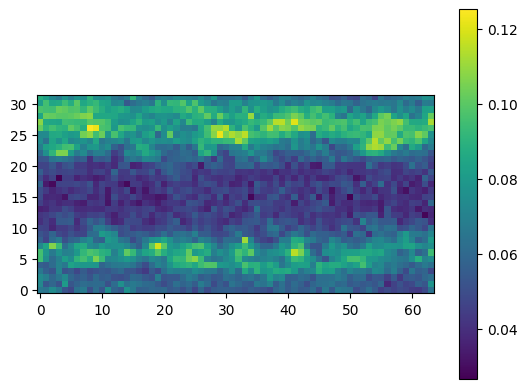

In [30]:
std_im = plt.imshow(dpm_imgs.std(dim=0)[ind].cpu(), origin='lower');
plt.colorbar(std_im);

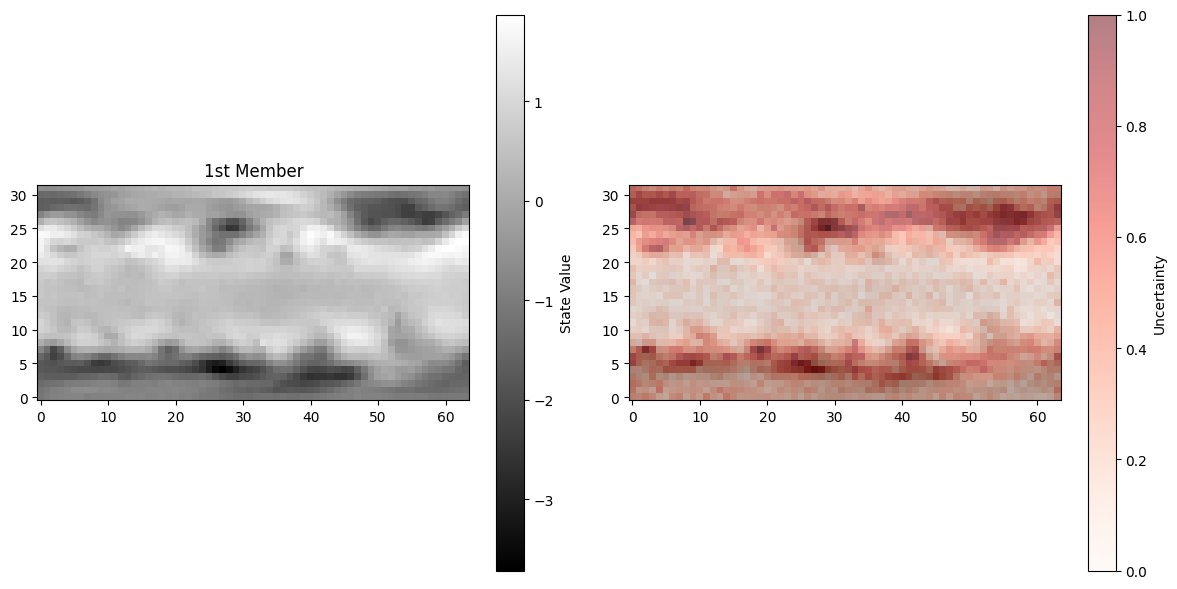

In [31]:
plot_state_with_uncertainty(dpm_imgs[0][ind].cpu(), dpm_imgs.std(dim=0)[ind].cpu(), '1st Member', '')

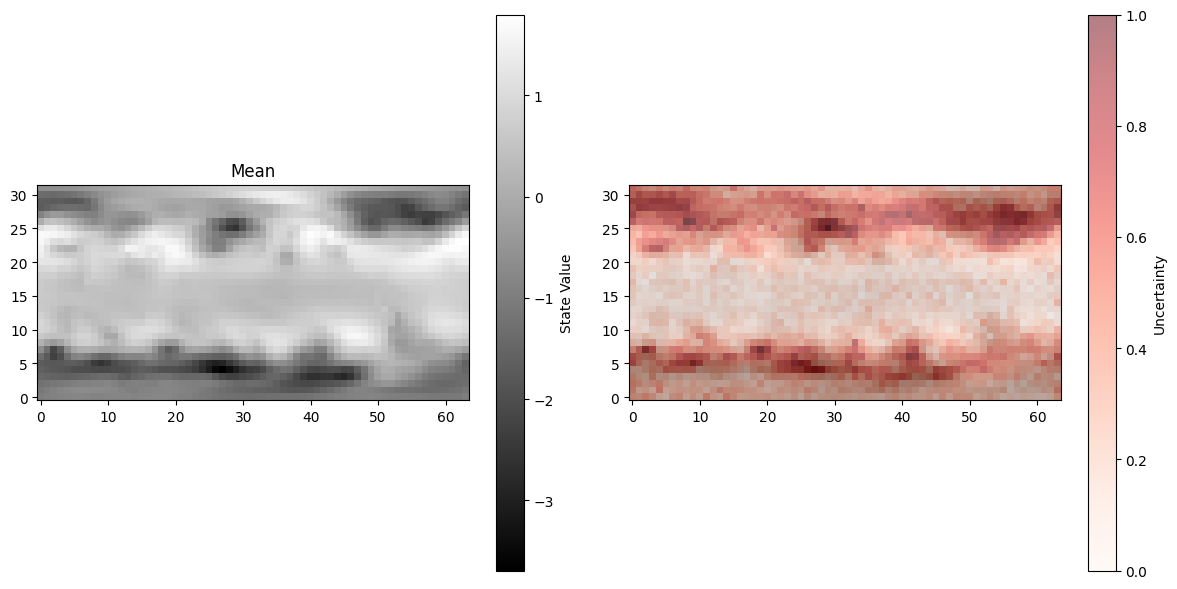

In [32]:
plot_state_with_uncertainty(dpm_imgs.mean(dim=0)[ind].cpu(), dpm_imgs.std(dim=0)[ind].cpu(), 'Mean', '')

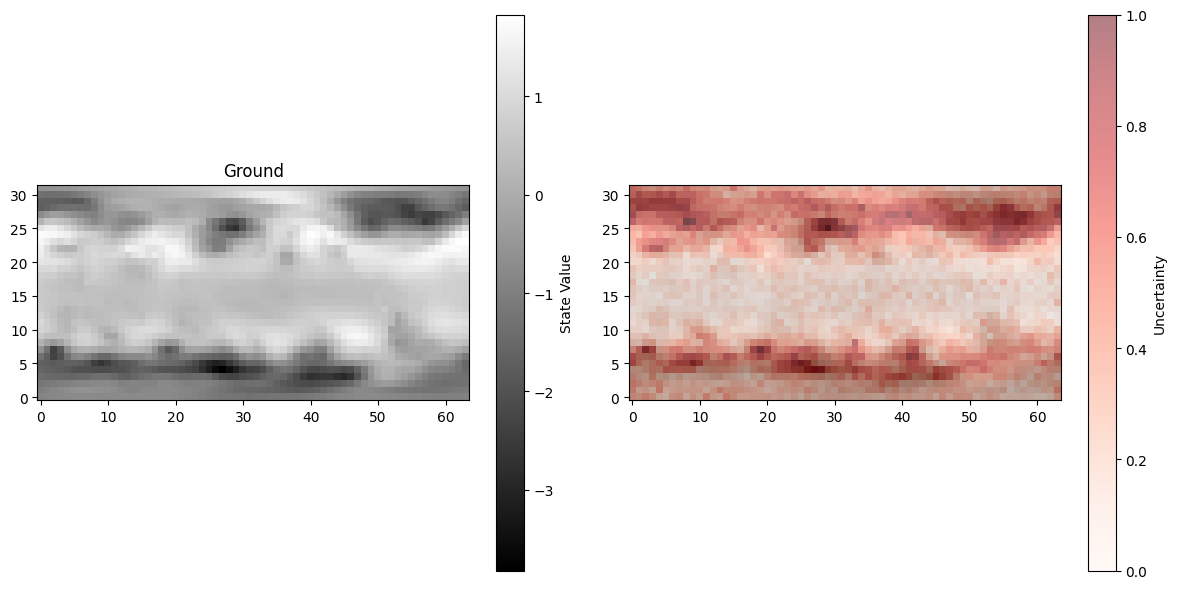

In [33]:
plot_state_with_uncertainty(x_grid[ind].cpu(), dpm_imgs.std(dim=0)[ind].cpu(), 'Ground', '')

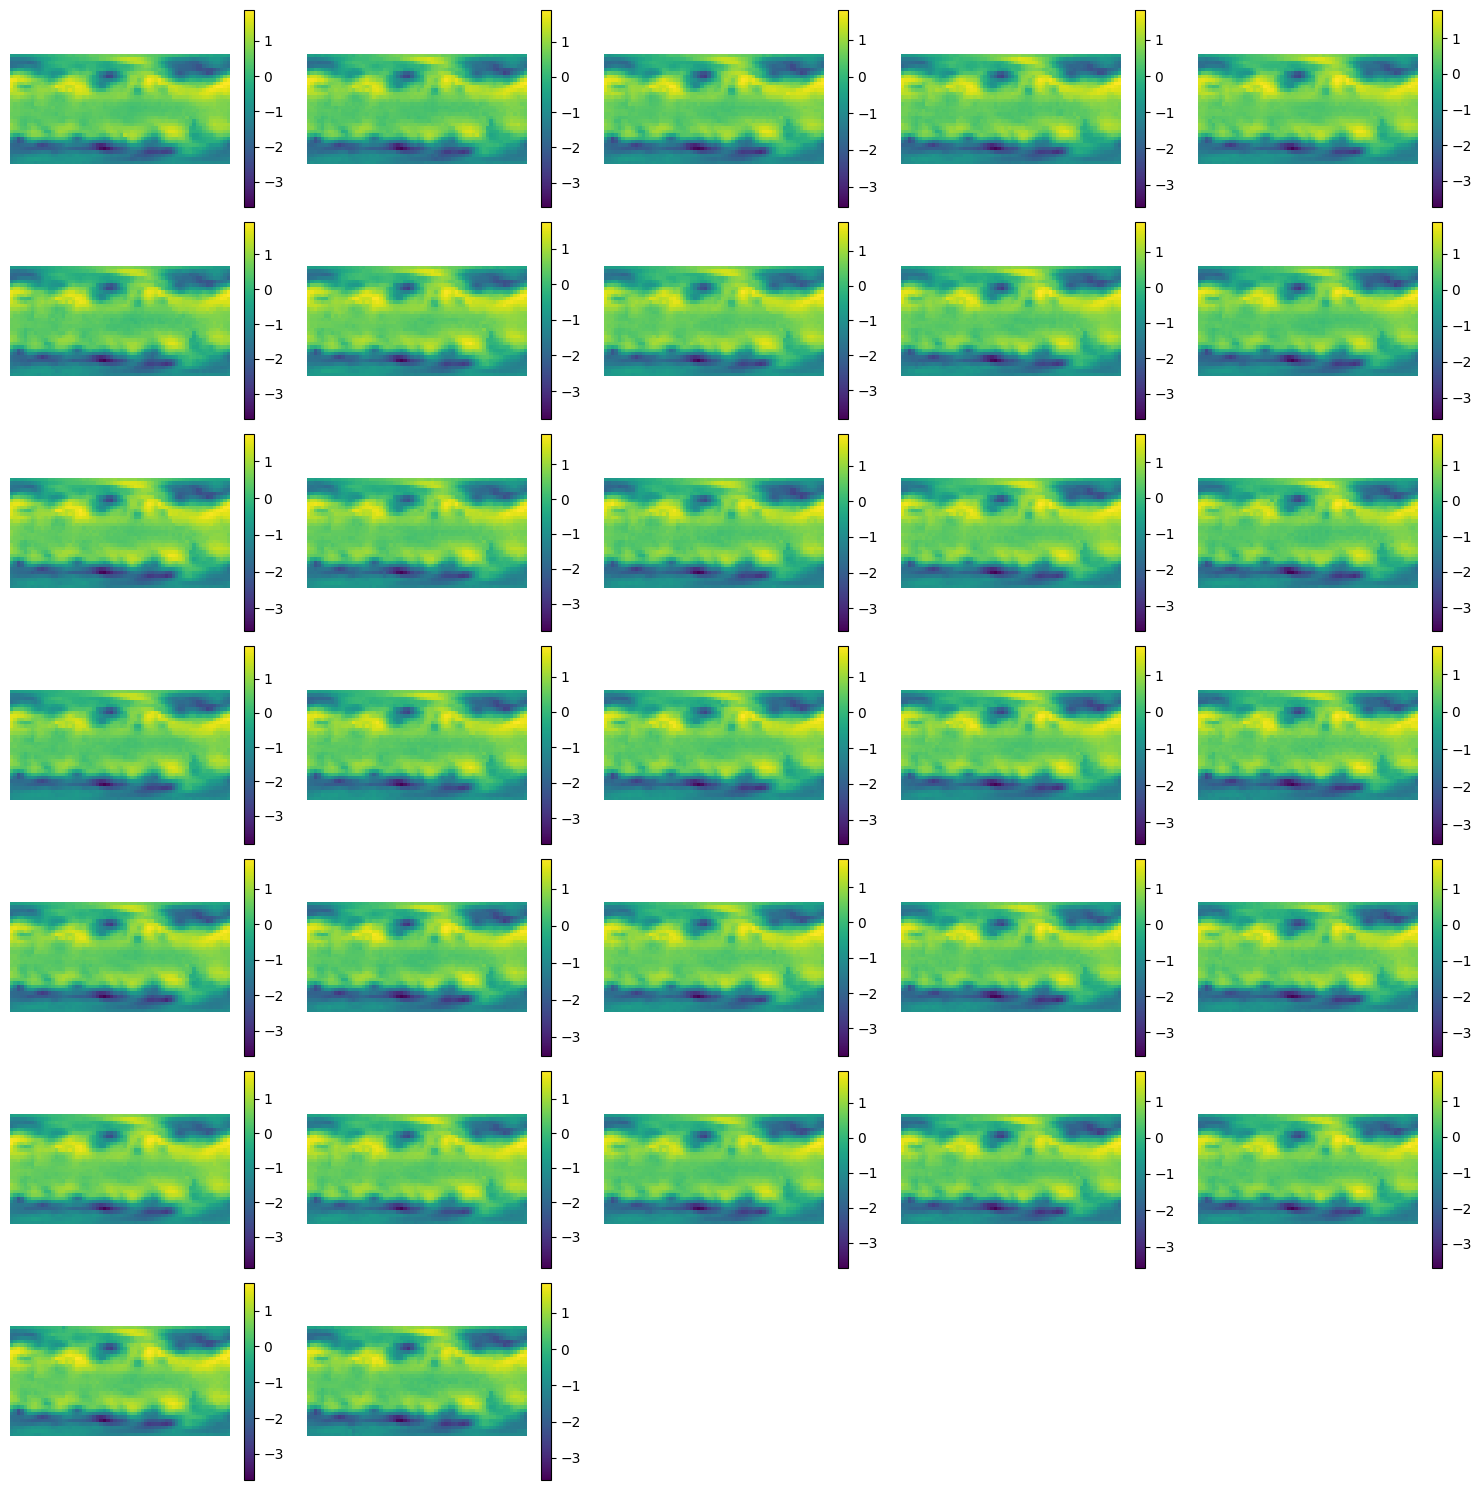

In [34]:
plot_all_channels(dpm_imgs[:, ind].unsqueeze(0).cpu())

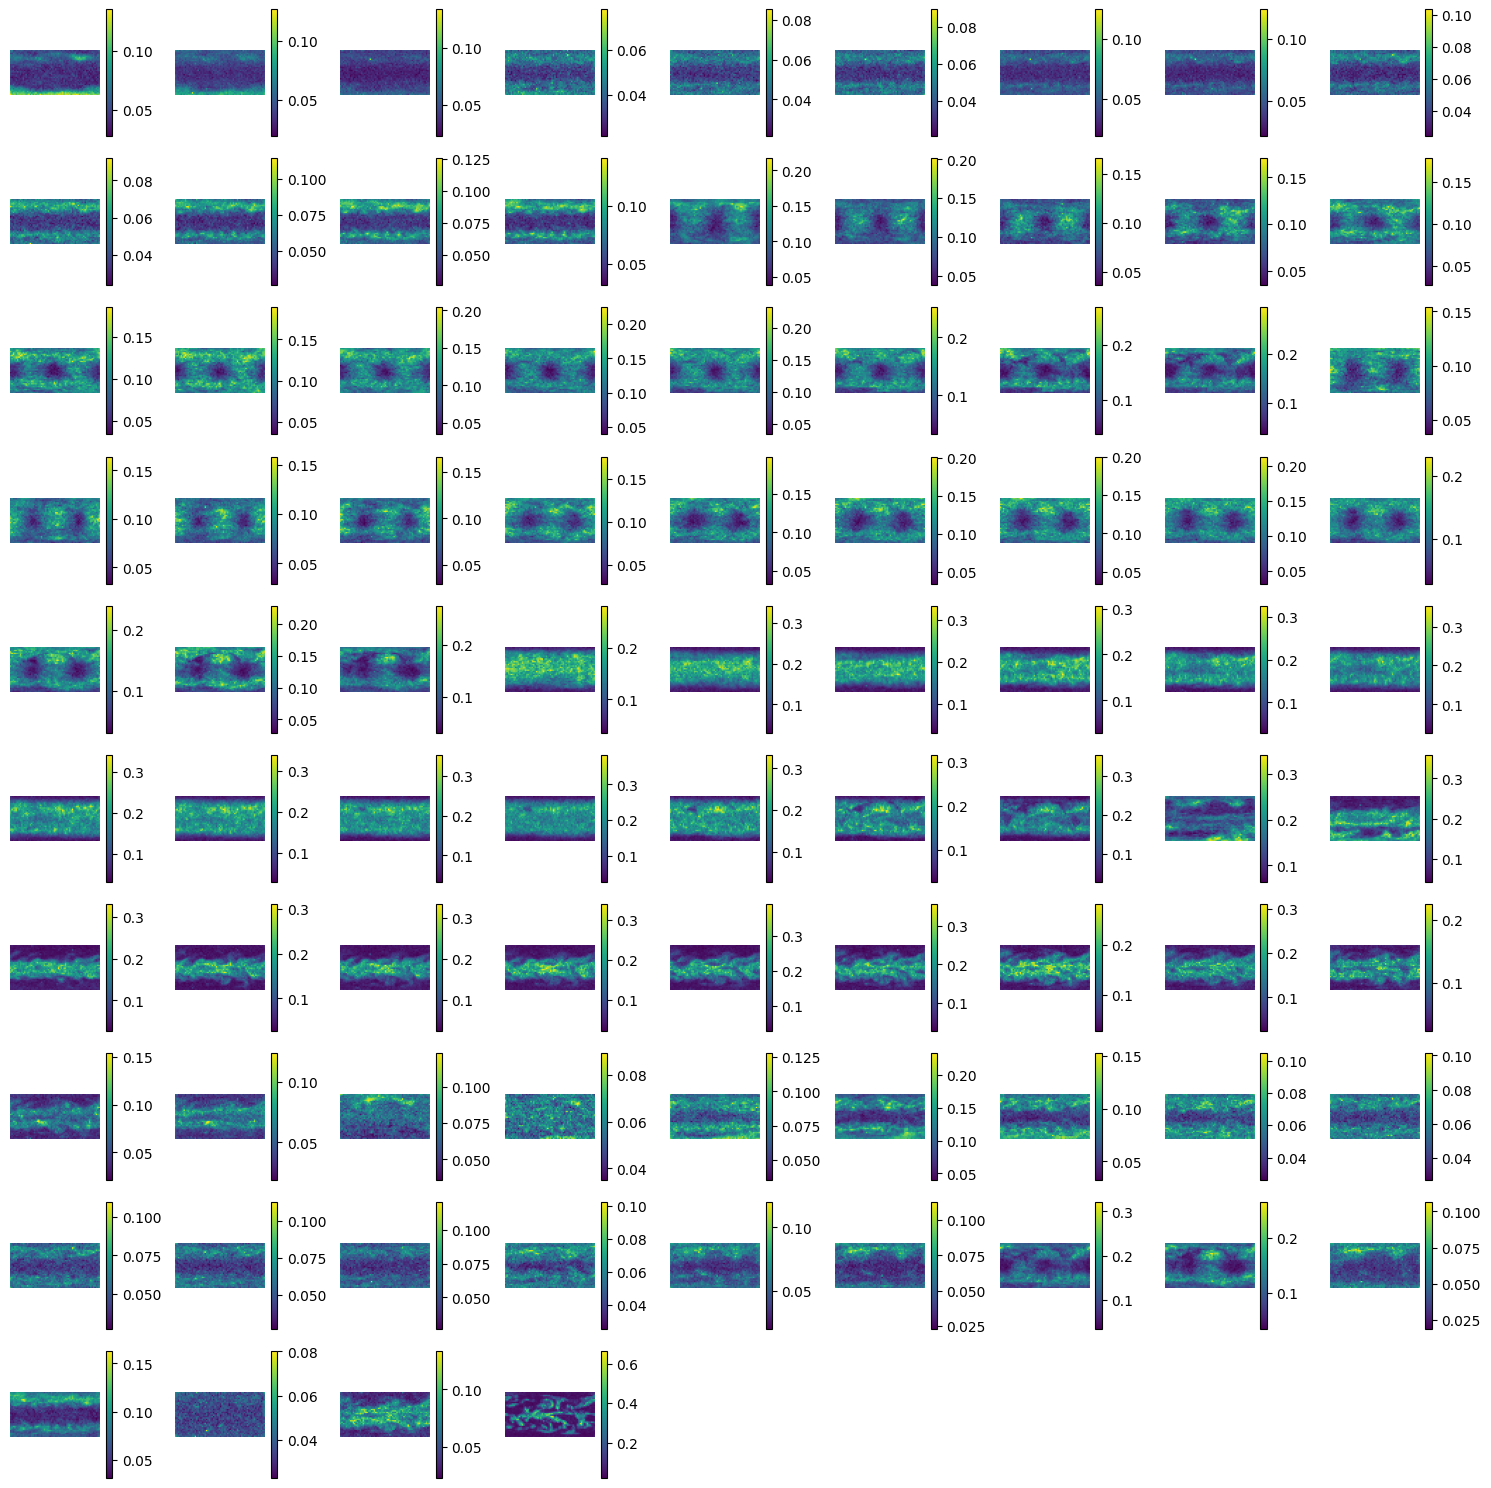

In [35]:
plot_all_channels(dpm_imgs.std(dim=0).unsqueeze(0).cpu())

# Metric Eval

...

In [36]:
# crps, spread_skill

# Sanity Check

...

In [24]:
imgs, _ = sampling_with_cfg_ddpm(
    diffusion_model, 1, 1000, beta, alpha, alpha_bar,
    'cuda', x_grid.shape, x_grid.unsqueeze(0).to('cuda'),
    guidance_scale=1.0
)

Denoising:   0%|          | 0/1000 [00:00<?, ?step/s]

In [25]:
torch.sqrt(((imgs[0].cpu() - x_grid) ** 2).mean())

tensor(0.0090)

In [26]:
ind = -2

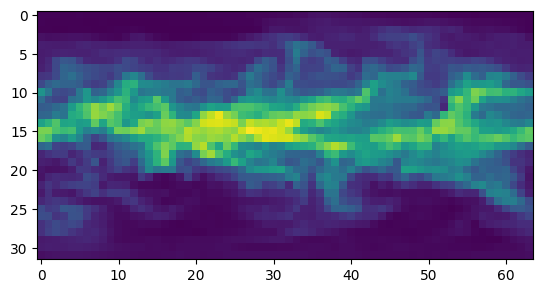

In [27]:
plt.imshow(imgs[0, ind].cpu());

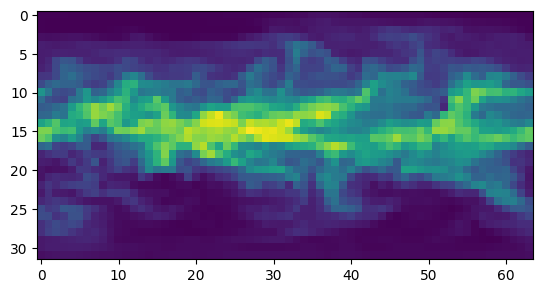

In [28]:
plt.imshow(x_grid[ind]);